In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 100
import numpy as np
import sys,os
my_PyCore_dir = os.path.dirname('/Users/aleksandrtusnin/Documents/Projects/PyCORe/')
sys.path.append(my_PyCore_dir)
import PyCORe_main as pcm
from scipy.constants import c, hbar
%matplotlib widget

In [2]:
Num_of_modes = 2**9
mu = np.arange(-Num_of_modes/2,Num_of_modes/2)

In [3]:
D2 = 4.1e6*2*np.pi

In [4]:
Dint = (mu**2*D2/2) 

In [5]:
PhysicalParameters = {'n0' : 1.9,
                      'n2' : 2.4e-19,### m^2/W
                      'FSR' : 181.7e9 ,
                      'w0' : 2*np.pi*192e12,
                      'width' : 1.5e-6,
                      'height' : 0.85e-6,
                      'kappa_0' : 50e6*2*np.pi,
                      'kappa_ex' : 50e6*2*np.pi,
                      'Dint' : Dint,
                      'Raman time' :  1e-15*0 #s
                      }

In [6]:
dNu_ini = -1e9 #Hz
dNu_end = 3e9 #Hz
nn = 2000
dOm = 2*np.pi*np.linspace(dNu_ini,dNu_end,nn)
scan_time = 1e-6 #s
P0 = 0.15### W
Pump = np.zeros(len(mu),dtype='complex')
Pump[0] = np.sqrt(P0)

In [7]:
simulation_parameters = {'slow_time' : scan_time,
                         'detuning_array' : dOm,
                         'noise_level' : 1e-9,
                         'output' : 'map',
                         'absolute_tolerance' : 1e-10,
                         'relative_tolerance' : 1e-6,
                         'max_internal_steps' : 2000}

In [8]:
single_ring = pcm.Resonator()
single_ring.Init_From_Dict(PhysicalParameters)

In [9]:
map2d = single_ring.Propagate_PseudoSpectralSAMCLIB(simulation_parameters, Pump,dt=0.5e-3)

f0^2 = 33.0
xi [-20.000000000000004,60.0]
J = 0.0
Pseudo Spectral Step adaptative Dopri853 from NR3 is running
In val_RE = 0.00055806


Initialization started
Initialization succesfull
  1% [                                                            ]

  3% [|                                                           ]

  4% [||                                                          ]

  6% [|||                                                         ]

  7% [||||                                                        ]

  9% [|||||                                                       ]

 10% [||||||                                                      ]

 12% [|||||||                                                     ]

 13% [||||||||                                                    ]

 15% [|||||||||                                                   ]

 16% [||||||||||                                                  ]

 18% [|||||||||||                                                 ]

 20% [||||||||||||                                                ]

 21% [|||||||||||||                                               ]

 23% [||||||||||||||                                              ]

 25% [|||||||||||||||                                             ]

 26% [||||||||||||||||                                            ]

 28% [||||||||||||||||                                            ]

 30% [||||||||||||||||||                                          ]

 31% [|||||||||||||||||||                                         ]

 33% [||||||||||||||||||||                                        ]

 35% [|||||||||||||||||||||                                       ]

 37% [||||||||||||||||||||||                                      ]

 38% [|||||||||||||||||||||||                                     ]

 40% [||||||||||||||||||||||||                                    ]

 42% [|||||||||||||||||||||||||                                   ]

 43% [||||||||||||||||||||||||||                                  ]

 45% [|||||||||||||||||||||||||||                                 ]

 47% [||||||||||||||||||||||||||||                                ]

 48% [|||||||||||||||||||||||||||||                               ]

 50% [||||||||||||||||||||||||||||||                              ]

 52% [|||||||||||||||||||||||||||||||                             ]

 53% [||||||||||||||||||||||||||||||||                            ]

 55% [|||||||||||||||||||||||||||||||||                           ]

 56% [||||||||||||||||||||||||||||||||||                          ]

 58% [|||||||||||||||||||||||||||||||||||                         ]

 60% [||||||||||||||||||||||||||||||||||||                        ]

 61% [||||||||||||||||||||||||||||||||||||                        ]

 63% [|||||||||||||||||||||||||||||||||||||                       ]

 64% [||||||||||||||||||||||||||||||||||||||                      ]

 66% [|||||||||||||||||||||||||||||||||||||||                     ]

 67% [||||||||||||||||||||||||||||||||||||||||                    ]

 69% [|||||||||||||||||||||||||||||||||||||||||                   ]

 70% [||||||||||||||||||||||||||||||||||||||||||                  ]

 72% [|||||||||||||||||||||||||||||||||||||||||||                 ]

 73% [||||||||||||||||||||||||||||||||||||||||||||                ]

 75% [|||||||||||||||||||||||||||||||||||||||||||||               ]

 76% [||||||||||||||||||||||||||||||||||||||||||||||              ]

 78% [||||||||||||||||||||||||||||||||||||||||||||||              ]

 79% [|||||||||||||||||||||||||||||||||||||||||||||||             ]

 81% [||||||||||||||||||||||||||||||||||||||||||||||||            ]

 82% [|||||||||||||||||||||||||||||||||||||||||||||||||           ]

 83% [||||||||||||||||||||||||||||||||||||||||||||||||||          ]

 85% [|||||||||||||||||||||||||||||||||||||||||||||||||||         ]

 86% [||||||||||||||||||||||||||||||||||||||||||||||||||||        ]

 88% [|||||||||||||||||||||||||||||||||||||||||||||||||||||       ]

 89% [|||||||||||||||||||||||||||||||||||||||||||||||||||||       ]

 91% [||||||||||||||||||||||||||||||||||||||||||||||||||||||      ]

 92% [|||||||||||||||||||||||||||||||||||||||||||||||||||||||     ]

 94% [||||||||||||||||||||||||||||||||||||||||||||||||||||||||    ]

 95% [|||||||||||||||||||||||||||||||||||||||||||||||||||||||||   ]

 97% [||||||||||||||||||||||||||||||||||||||||||||||||||||||||||  ]

 98% [||||||||||||||||||||||||||||||||||||||||||||||||||||||||||| ]

100% [||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||]

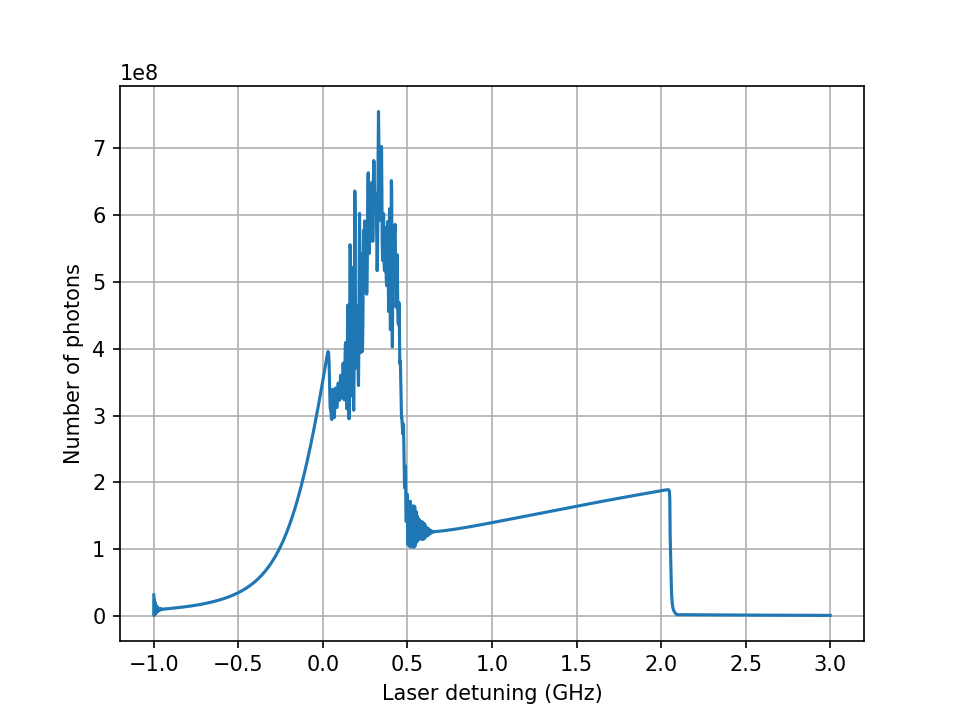

In [10]:
Num_of_photons = np.sum(np.abs((map2d[:,:])/(Num_of_modes))**2,axis=1)
fig = plt.figure(frameon=False,dpi=150)
ax = fig.add_subplot(1,1,1)
ax.plot(dOm/2/np.pi/1e9,Num_of_photons)
ax.set_xlabel('Laser detuning (GHz)')
ax.set_ylabel('Number of photons')
ax.grid(True)
plt.show()

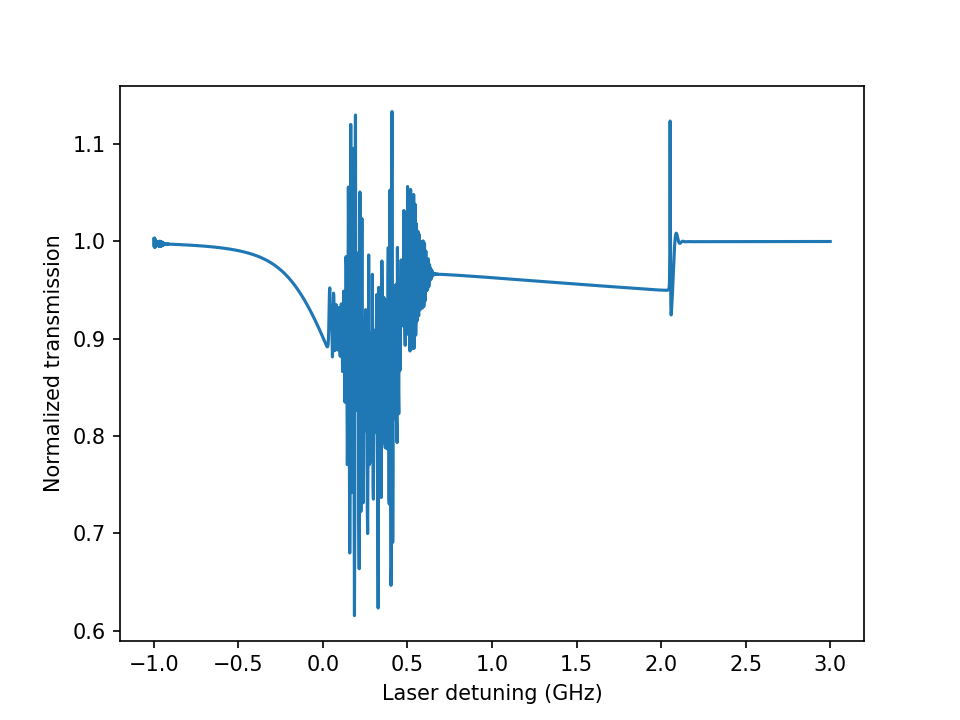

In [11]:
Sin = Pump/np.sqrt(hbar*PhysicalParameters['w0'])
Sout = np.zeros_like(map2d)
Sout = Sin - np.sqrt(single_ring.kappa_ex)*map2d/Num_of_modes
fig = plt.figure(frameon=False,dpi=150)
ax = fig.add_subplot(1,1,1)
ax.plot(dOm/2/np.pi/1e9,np.sum(abs(Sout)**2,axis=1)/abs(Sin[0])**2)
ax.set_xlabel('Laser detuning (GHz)')
ax.set_ylabel('Normalized transmission')
plt.show()


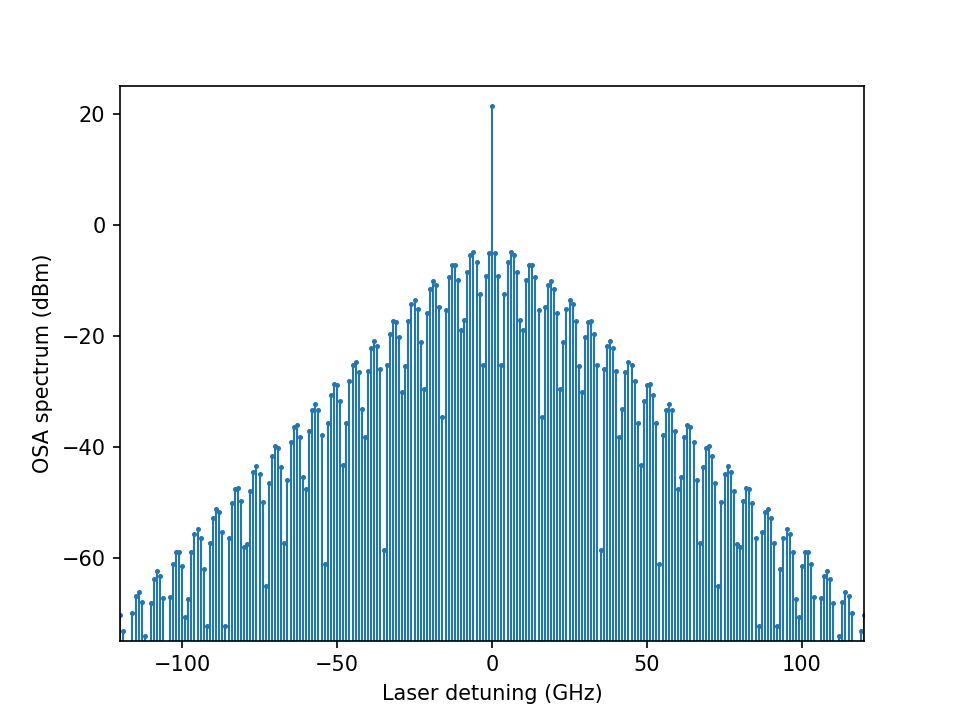

In [12]:
fig = plt.figure(frameon=False,dpi=150)
ax = fig.add_subplot(1,1,1)
ax.vlines(mu,-300,10*np.log10(np.abs(np.fft.fftshift(Sout[1000,:]))**2*hbar*PhysicalParameters['w0']/1e-3),lw=1.0)
ax.scatter(mu,10*np.log10(np.abs(np.fft.fftshift(Sout[1000,:]))**2*hbar*PhysicalParameters['w0']/1e-3),s=2.0)
ax.set_xlabel('Laser detuning (GHz)')
ax.set_ylabel('OSA spectrum (dBm)')
ax.set_ylim(-75,25)
ax.set_xlim(-120,120)
plt.show()

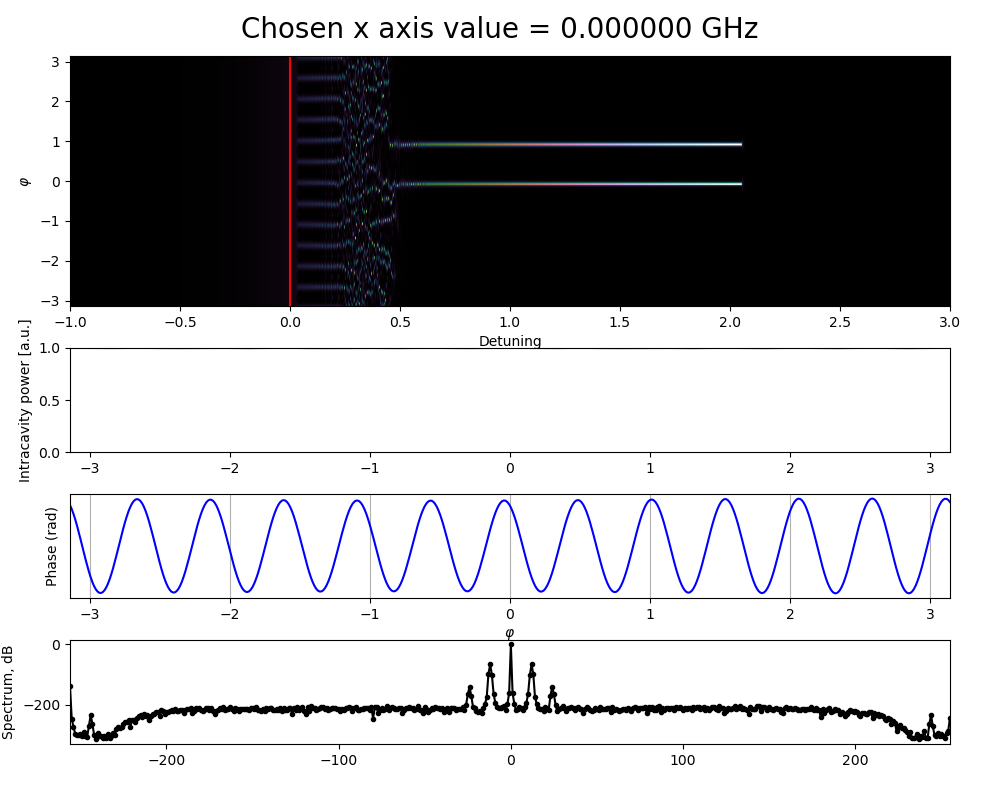

In [13]:
pcm.Plot_Map(np.fft.ifft(map2d,axis=1),dOm/2/np.pi/1e9,xlabel='Detuning', units='GHz')